In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [81]:
data = pd.read_csv('C:/Users/PC/Desktop/data/anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv')

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [85]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
data.shape

(200, 5)

In [89]:
data = data.drop(['CustomerID'], axis = 1)
data = data.drop(['Spending Score (1-100)'], axis = 1)

In [91]:
data.isna().sum()

Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64

In [93]:
label_encoder = preprocessing.LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

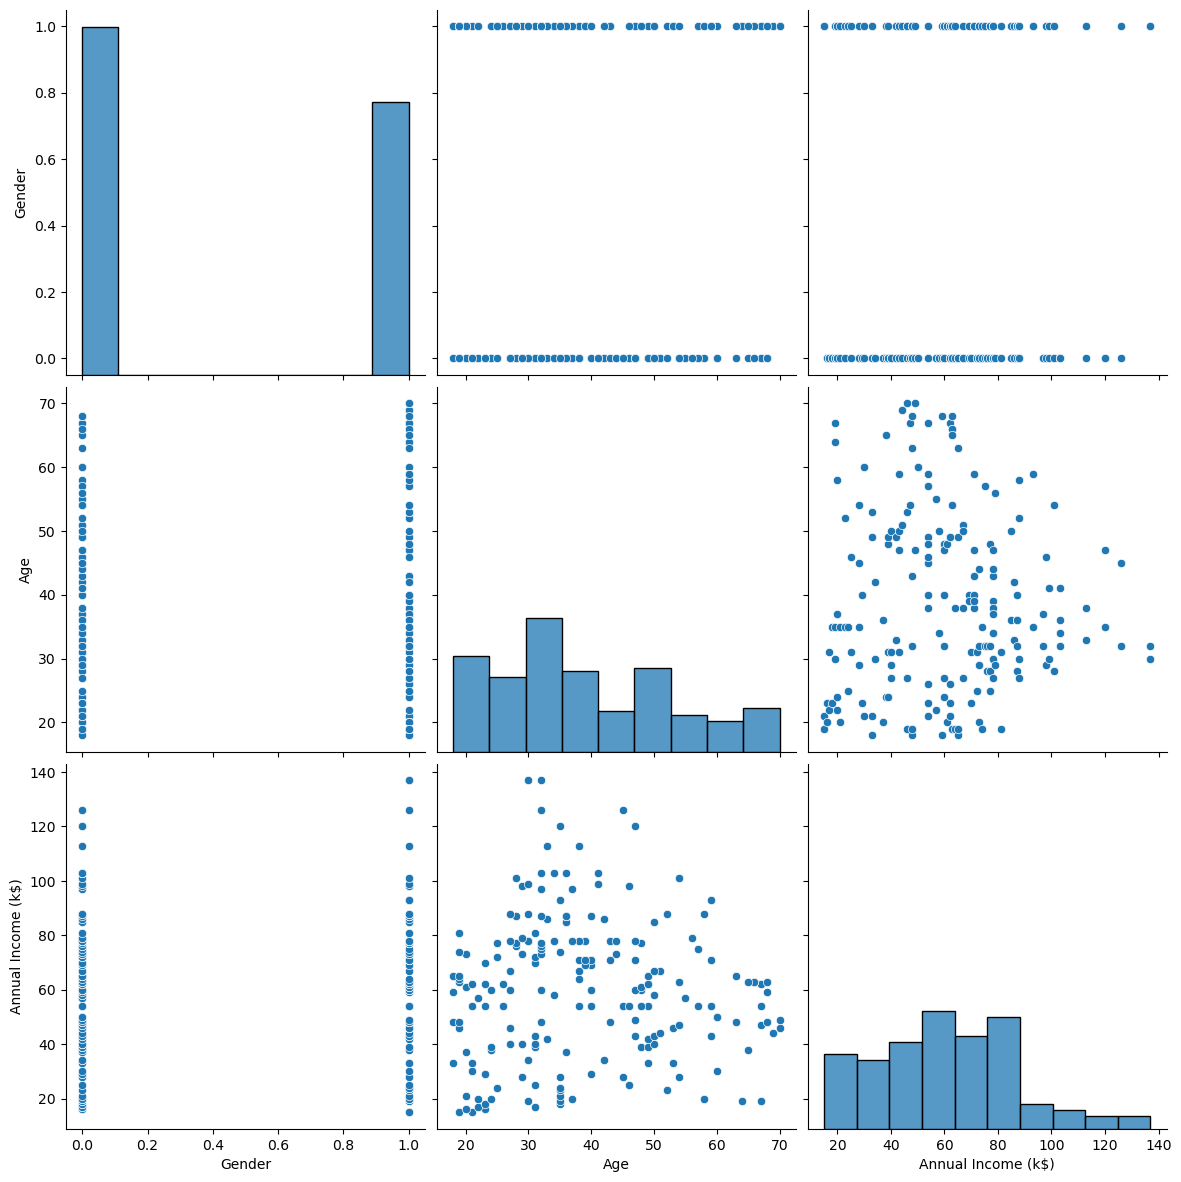

In [95]:
sns.pairplot(data.dropna(),size=4,kind='scatter')

In [96]:
data['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

<Axes: >

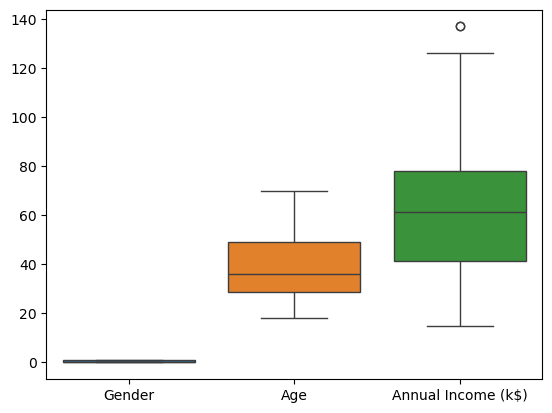

In [97]:
sns.boxplot(data=data)

In [101]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
x

,Gender,Age,Annual Income (k$)
0,1.128152,-1.424569,-1.738999
1,1.128152,-1.281035,-1.738999
2,-0.886405,-1.352802,-1.700830
3,-0.886405,-1.137502,-1.700830
4,-0.886405,-0.563369,-1.662660
...,...,...,...
195,-0.886405,-0.276302,2.268791
196,-0.886405,0.441365,2.497807
197,1.128152,-0.491602,2.497807
198,1.128152,-0.491602,2.917671


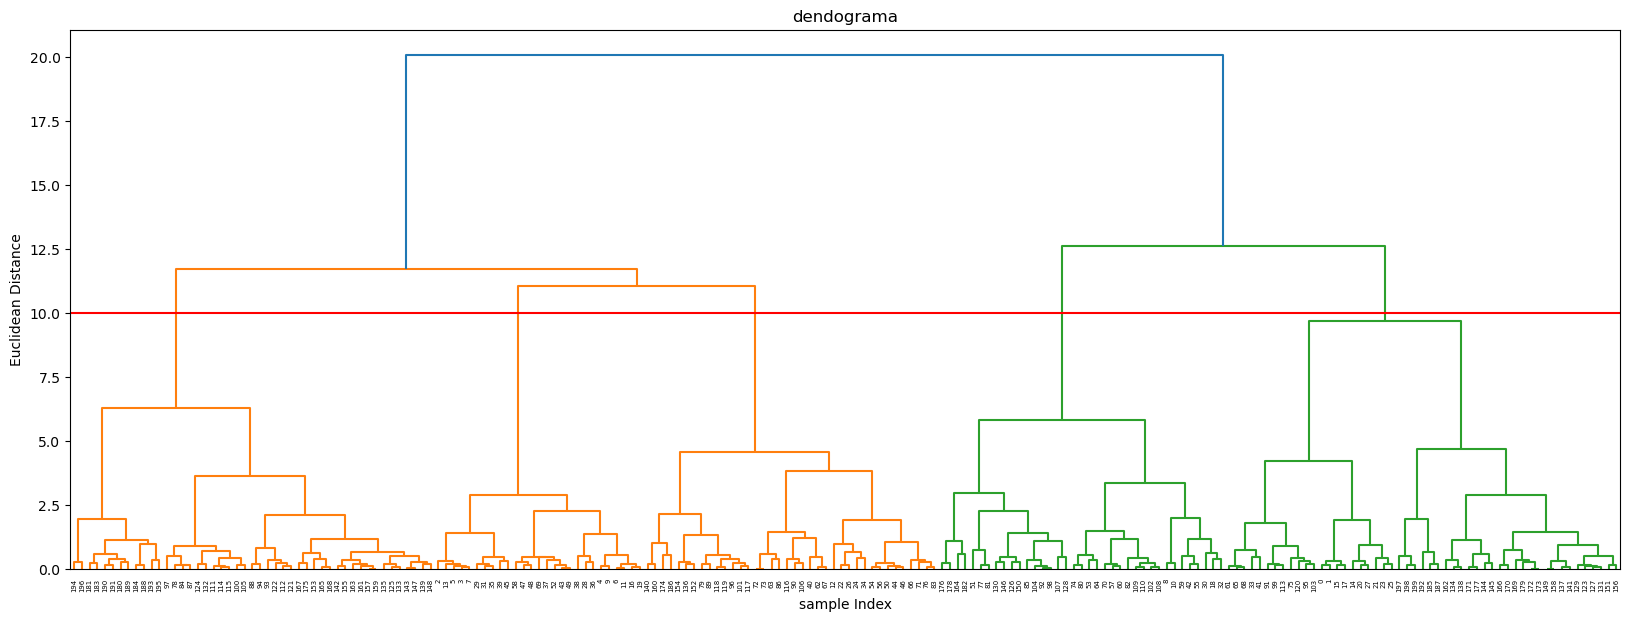

In [103]:
#los datos ya estan cargados y limpiados  unu 
ward_clustering = linkage(x,method='ward'  , metric = 'euclidean')
plt.figure(figsize=(20,7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r' , linestyle = '-')
plt.title('dendograma')
plt.xlabel('sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [124]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([5, 5, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 3, 4, 5, 5, 4, 5, 2, 4, 5, 5,
       3, 5, 3, 5, 3, 5, 4, 4, 2, 4, 2, 5, 3, 4, 4, 4, 4, 4, 3, 5, 2, 4,
       3, 4, 3, 4, 4, 4, 3, 2, 4, 2, 3, 2, 3, 2, 4, 2, 2, 5, 3, 3, 2, 5,
       3, 3, 5, 4, 2, 3, 3, 3, 2, 5, 3, 2, 0, 3, 2, 2, 2, 3, 0, 2, 3, 0,
       0, 3, 3, 5, 2, 0, 0, 5, 3, 0, 2, 5, 0, 3, 2, 5, 2, 0, 3, 2, 2, 2,
       2, 0, 0, 5, 0, 0, 3, 3, 3, 3, 5, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 1, 0, 3, 1, 1, 0, 3, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 3, 0,
       3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 3, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [130]:
labels = labels_hier
colores=['red','green','cyan','blue','black','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

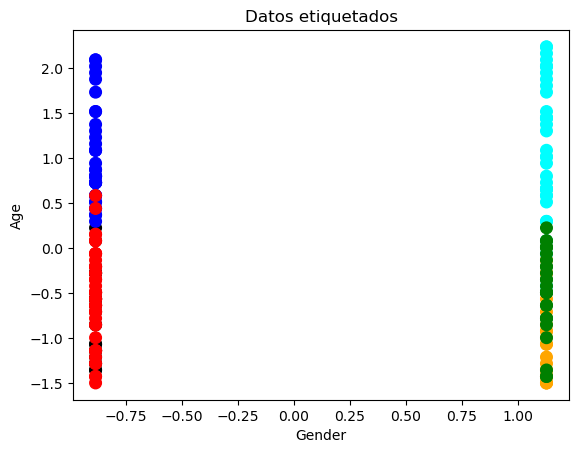

In [132]:
f1 = x['Gender'].values 	
f2 =x['Age'].values
plt.scatter(f1,f2,c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

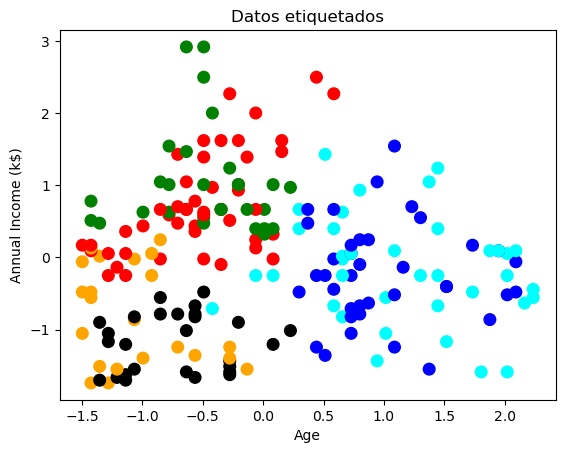

In [134]:
f1 = x['Age'].values 	
f2 =x['Annual Income (k$)'].values
plt.scatter(f1,f2,c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

Text(0, 0.5, 'media indices silhouette')

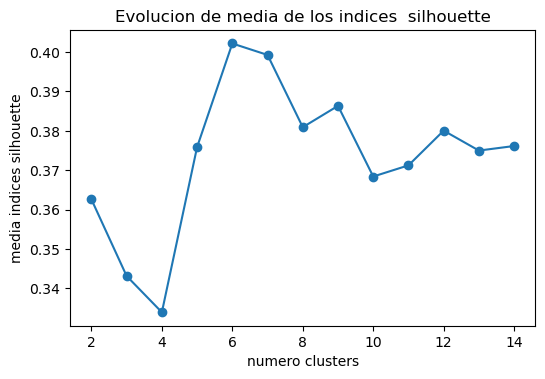

In [136]:
#metodo silhouette  para identificar le numero optimo de clusters
range_n_cluster = range(2,15)
valores_medios_silhouette = []
for n_clusters in range_n_cluster:
    modelo = AgglomerativeClustering(
        metric='euclidean',
        linkage='ward',
        n_clusters =n_clusters
    )
    clusters_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x,clusters_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig,ax=plt.subplots(1,1,figsize=(6,3.84))
ax.plot(range_n_cluster,valores_medios_silhouette,marker='o')
ax.set_title("Evolucion de media de los indices  silhouette")
ax.set_xlabel("numero clusters")
ax.set_ylabel('media indices silhouette')

In [138]:
#calcular medidas  de calidad  para clustering jerarquico
print("Medidas de  calidad para k-means: ")
print("puntaje de silueta: " , metrics.silhouette_score(x,labels_hier))
print("Indice de calinsku-Harabasz: " , metrics.calinski_harabasz_score(x,labels_hier))
print("Davies-bouldin Index: ", metrics.davies_bouldin_score(x,labels_hier))


Medidas de  calidad para k-means: 
puntaje de silueta:  0.4021772752408764
Indice de calinsku-Harabasz:  124.51523062014174
Davies-bouldin Index:  0.7897637973720867


Valores 3 cluster

* Medidas de  calidad para k-means: 
* puntaje de silueta:  0.3431472323456367
* Indice de calinsku-Harabasz:  86.611083409954
* Davies-bouldin Index:  1.0811769974928038